In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def UniformQuantizer(in_val, n_bits, xmax, m):
    L = 2**n_bits
    delta = 2 * xmax / L
    temp = in_val / delta
    if m == 1:
        rounded_temp = [np.round(x) for x in temp]
        return np.array(rounded_temp)
    else:
        rounded_temp = [np.floor(x) for x in temp]
        return np.array(rounded_temp)


In [3]:
def UniformDequantizer(q_ind, n_bits, xmax, m):
    L = 2**n_bits
    delta = 2 * xmax / (L)
    if m == 1:
        return np.array(q_ind) * delta
    else:
        return np.array(q_ind) * delta + delta / 2


In [4]:
def nonuniformQuantizer(in_val, n_bits, xmax, m, mu):
    if mu != 0:
        in_val = np.sign(in_val)*(np.log(1+mu*np.abs(in_val/max(in_val)))/np.log(mu+1))
    return UniformQuantizer(in_val, n_bits, xmax, m)


In [5]:
def nonuniformDequantizer(q_ind, n_bits, xmax, m, mu):
    y = UniformDequantizer(q_ind, n_bits, xmax, m)
    if mu != 0:
        y = np.sign(y)*((np.power(1+mu, np.abs(y))-1)/mu)
    return y


In [6]:
x = np.arange(-6, 6, 0.01)
y = np.arange(-6, 6, 0.01)
n_bits = 3
maxx = 6
q0 = UniformDequantizer(UniformQuantizer(
    x, n_bits, maxx, 0), n_bits, maxx, 0)
q1 = UniformDequantizer(UniformQuantizer(
    x, n_bits, maxx, 1), n_bits, maxx, 1)


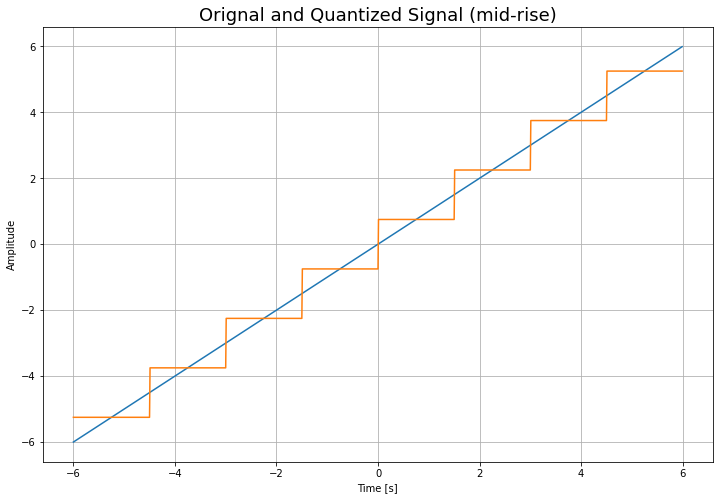

In [7]:
fig = plt.figure(figsize=(12, 8))
plt.plot(
    x,
    y,
    label="Original Signal",
)
plt.plot(
    x,
    q0,
    label="Quantized Signal (mid-rise)",
)
plt.title("Orignal and Quantized Signal (mid-rise)", fontsize=18)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()


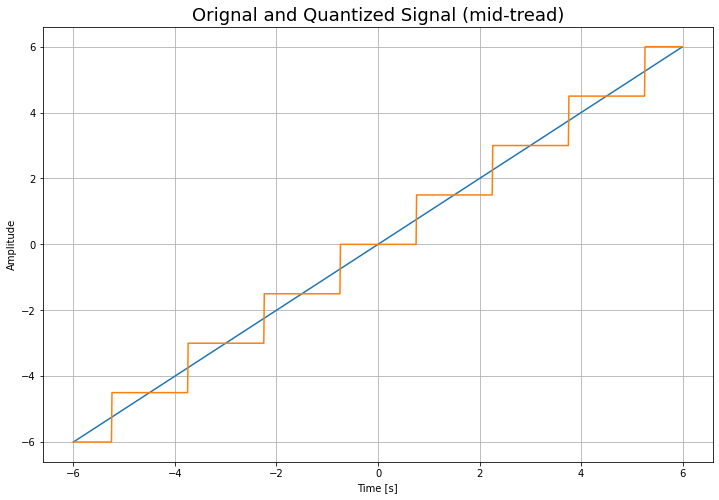

In [8]:
fig = plt.figure(figsize=(12, 8))
plt.plot(
    x,
    y,
    label="Original Signal",
)
plt.plot(
    x,
    q1,
    label="Quantized Signal (mid-tread)",
)
plt.title("Orignal and Quantized Signal (mid-tread)", fontsize=18)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()


In [9]:
qError_actual = []
qError_theoretical = []
n_bits = np.arange(2, 9, 1)
y = np.random.uniform(low=-5, high=5, size=10000)
for i in n_bits:
    q0 = UniformDequantizer(UniformQuantizer(
        y, i, 5, 0), i, 5, 0)
    qError_actual.append(np.mean((y**2))/np.mean((y - q0)**2))
    qError_theoretical.append(np.mean((y**2))/(((10)/(2**i))**2/12))
qError_actual = 10*np.log10(qError_actual)
qError_theoretical = 10*np.log10(qError_theoretical)


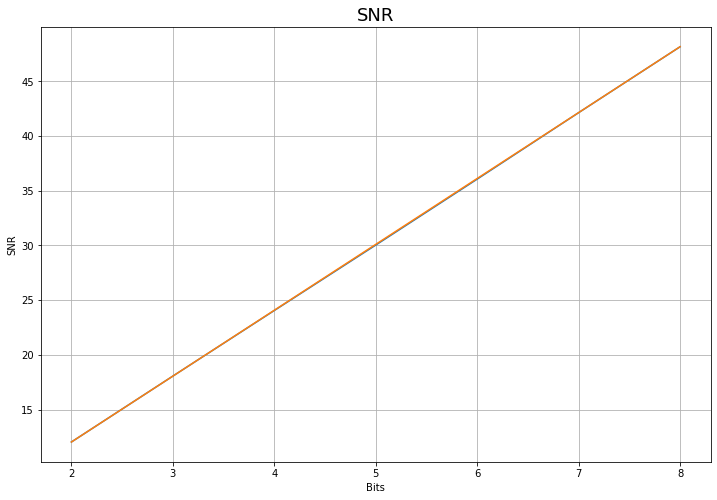

In [10]:
fig = plt.figure(figsize=(12, 8))
plt.plot(
    n_bits,
    qError_actual,
    label="Actual Error",
)
plt.plot(
    n_bits,
    qError_theoretical,
    label="Theoretical Error",
)
plt.title("SNR", fontsize=18)
plt.xlabel("Bits")
plt.ylabel("SNR")
plt.grid()


In [11]:
qError_actual_uniform = []
qError_theoretical_uniform = []
y = np.random.exponential(size=10000) * \
    np.random.choice([-1, 1], size=10000)
for i in n_bits:
    q0 = UniformDequantizer(UniformQuantizer(
        y, i, 5, 0), i, 5, 0)
    qError_actual_uniform.append(np.mean((y**2))/np.mean((y - q0)**2))
    qError_theoretical_uniform.append(np.mean((y**2))/(((10)/(2**i))**2/12))
qError_actual_uniform = 10*np.log10(qError_actual_uniform)
qError_theoretical_uniform = 10*np.log10(qError_theoretical_uniform)


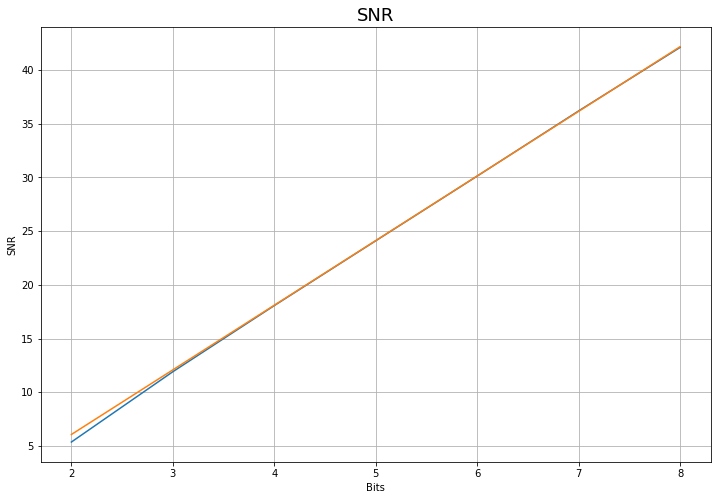

In [12]:
fig = plt.figure(figsize=(12, 8))
plt.plot(
    n_bits,
    qError_actual_uniform,
    label="Actual Error",
)
plt.plot(
    n_bits,
    qError_theoretical_uniform,
    label="Theoretical Error",
)
plt.title("SNR", fontsize=18)
plt.xlabel("Bits")
plt.ylabel("SNR")
plt.grid()


In [13]:
y = np.random.exponential(size=10000) * \
    np.random.choice([-1, 1], size=10000)
norm = y/max(y)

qError_actual = [[], [], [], []]
qError_theoretical = [[], [], [], []]
qError_actual[0] = qError_actual_uniform
qError_theoretical[0] = qError_theoretical_uniform

mu = [5, 100, 200]

x = 1
for i in mu:
    for j in n_bits:
        q0 = nonuniformDequantizer(nonuniformQuantizer(
            y, j, 1, 0, i), j, 1, 0, i)
        qError_actual[x].append(np.mean((norm**2))/np.mean((norm - q0)**2))
        qError_theoretical[x].append((3*(2**j)**2)/(np.log(1+i)**2))
    qError_actual[x] = 10*np.log10(qError_actual[x])
    qError_theoretical[x] = 10*np.log10(qError_theoretical[x])
    x += 1

mu = [0, 5, 100, 200]

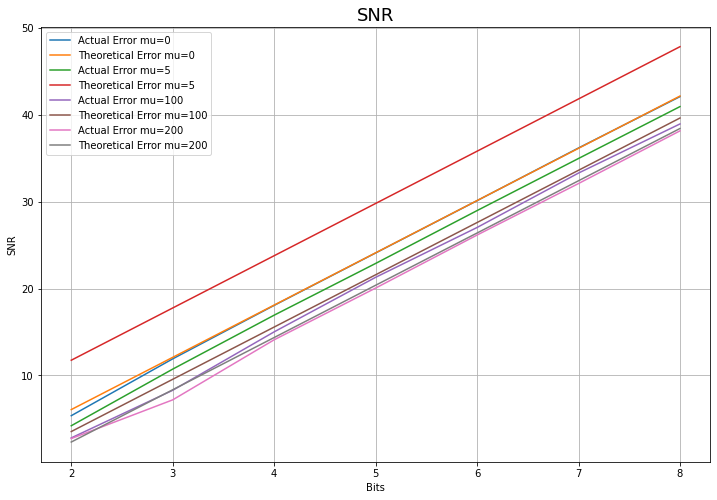

In [14]:
fig = plt.figure(figsize=(12, 8))
for i in range(0,len(qError_actual)):
    plt.plot(
        n_bits,
        qError_actual[i],
        label="Actual Error mu="+str(mu[i]),
    )
    plt.plot(
        n_bits,
        qError_theoretical[i],
        label="Theoretical Error mu="+str(mu[i]),
    )
plt.title("SNR", fontsize=18)
plt.xlabel("Bits")
plt.ylabel("SNR")
plt.grid()
plt.legend()
plt.show()
